# Student Alcohol Compsumption
Social, gender and study data from secondary school students

## Preparation
### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [2]:
data_path_por = '../data/student-por.csv'
df = pd.read_csv(data_path_por)

### Inspect data
#### Preview

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


#### Columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

#### Summary
The dataset contains 33 columns and 649 rows. The columns contain both numerical and categorical data. There are no missing values in the dataset.

### Data preprocessing

#### Consistency check

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].unique())
        print()

school
['GP' 'MS']

sex
['F' 'M']

address
['U' 'R']

famsize
['GT3' 'LE3']

Pstatus
['A' 'T']

Mjob
['at_home' 'health' 'other' 'services' 'teacher']

Fjob
['teacher' 'other' 'services' 'health' 'at_home']

reason
['course' 'other' 'home' 'reputation']

guardian
['mother' 'father' 'other']

schoolsup
['yes' 'no']

famsup
['no' 'yes']

paid
['no' 'yes']

activities
['no' 'yes']

nursery
['yes' 'no']

higher
['yes' 'no']

internet
['no' 'yes']

romantic
['no' 'yes']



### Descriptive statistics
#### Summary statistics

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


#### Distribution of variables

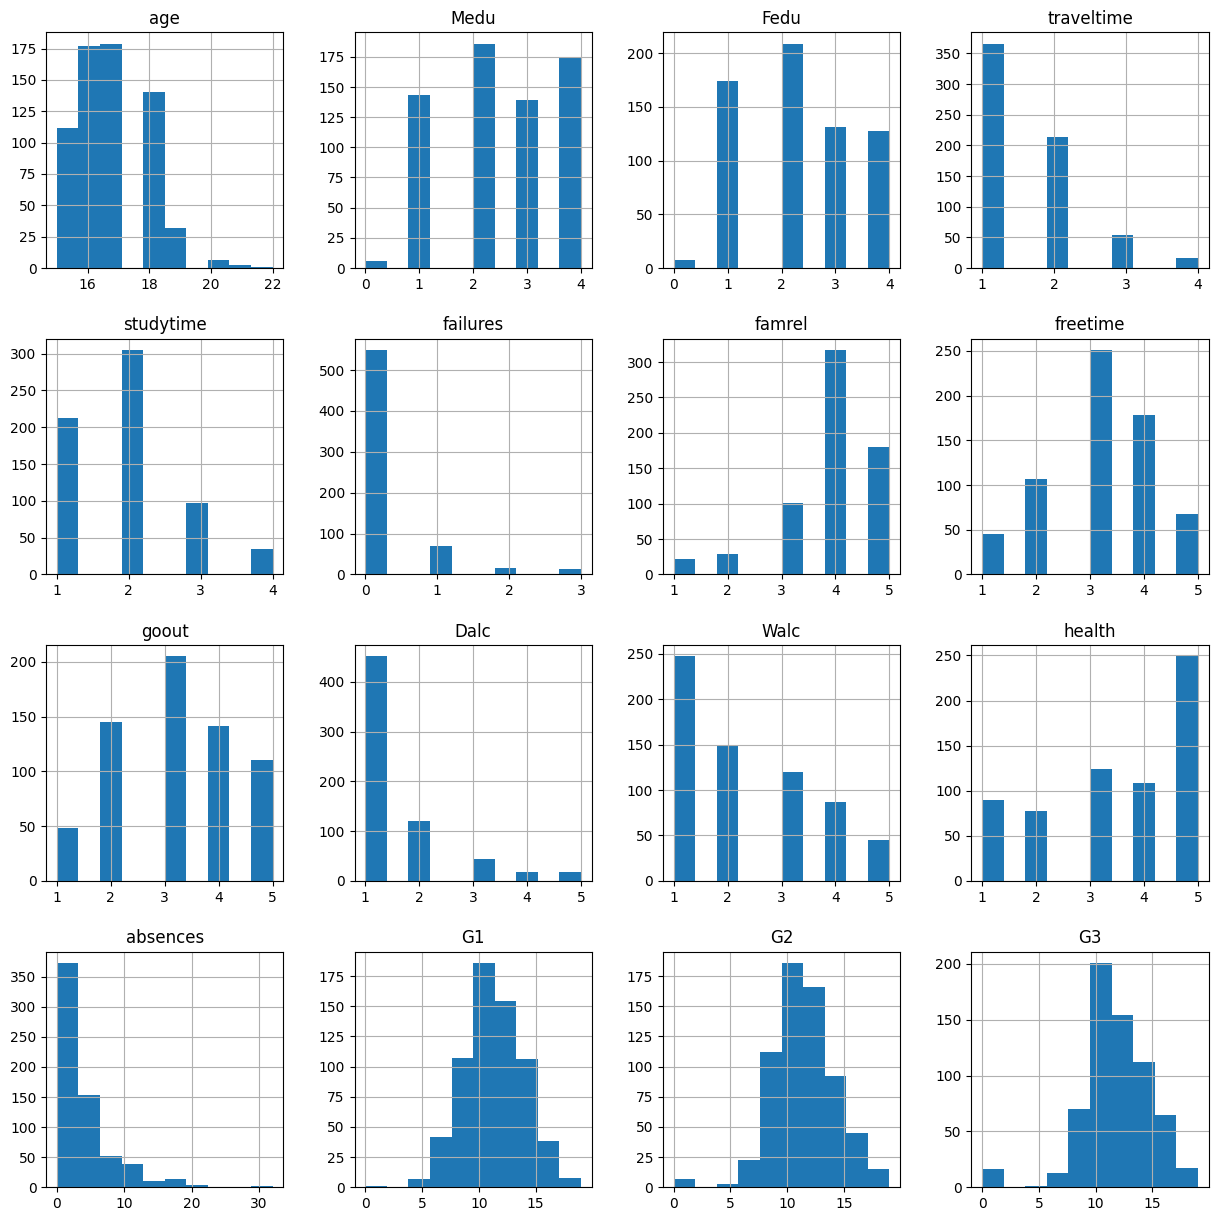

In [ ]:
df[df.select_dtypes().columns].hist(figsize=(15, 15))
plt.show()

#### Correlation matrix

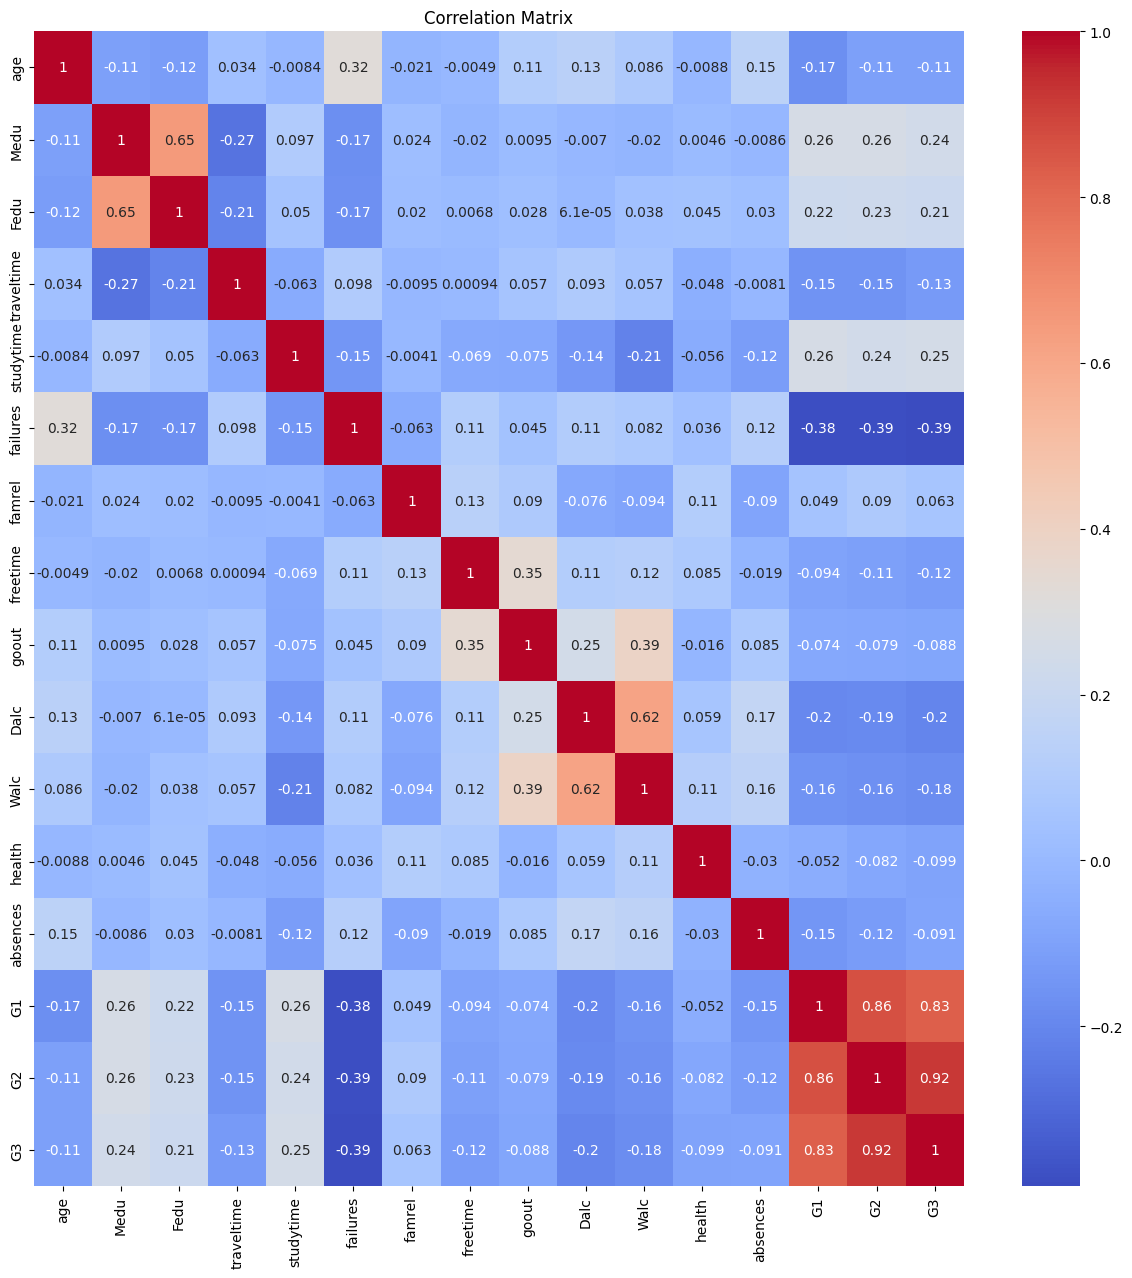

In [8]:
corr = df[df.select_dtypes(include=['int64']).columns].corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Distribution of categorical variables

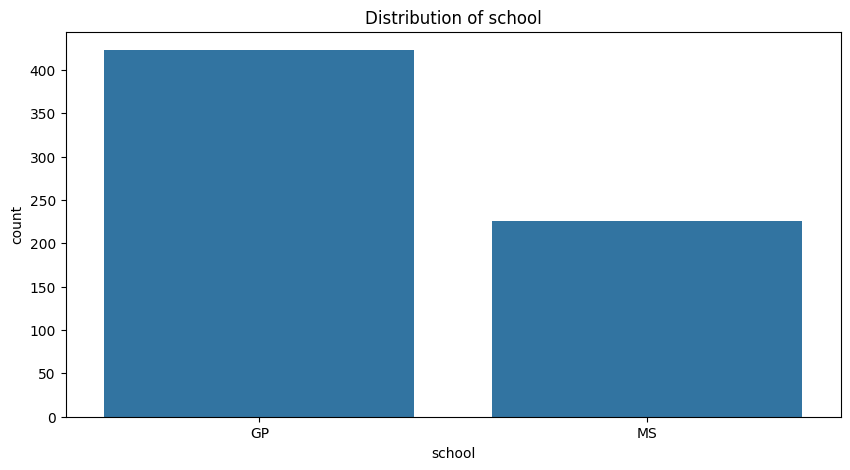

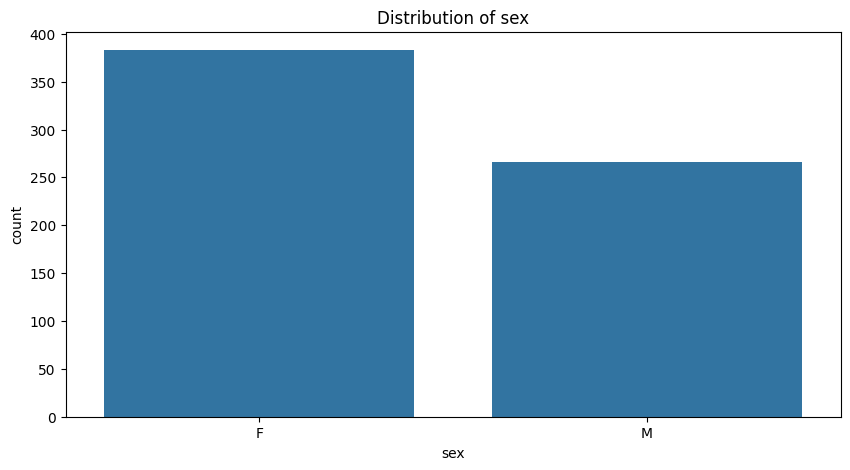

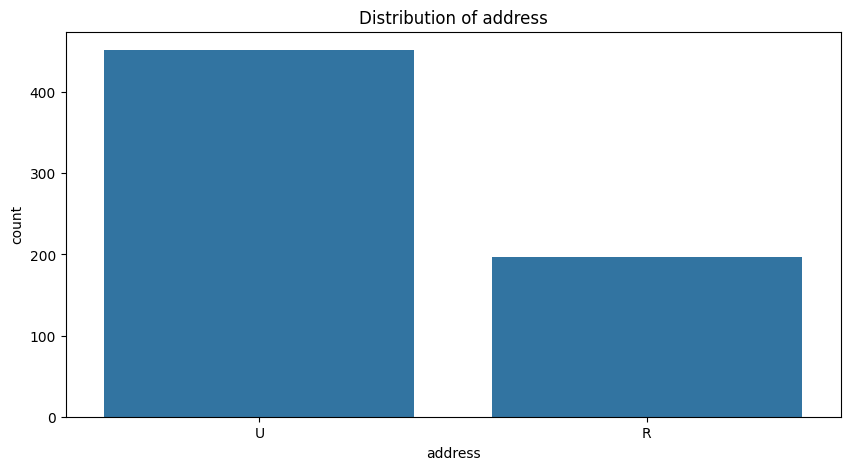

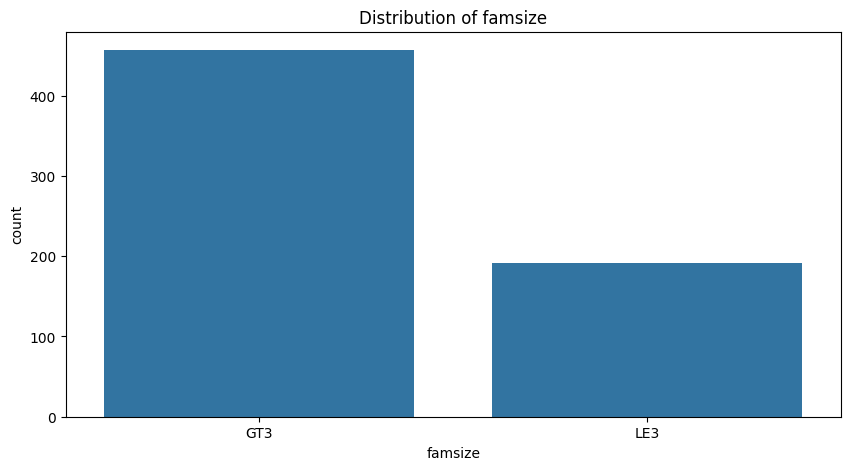

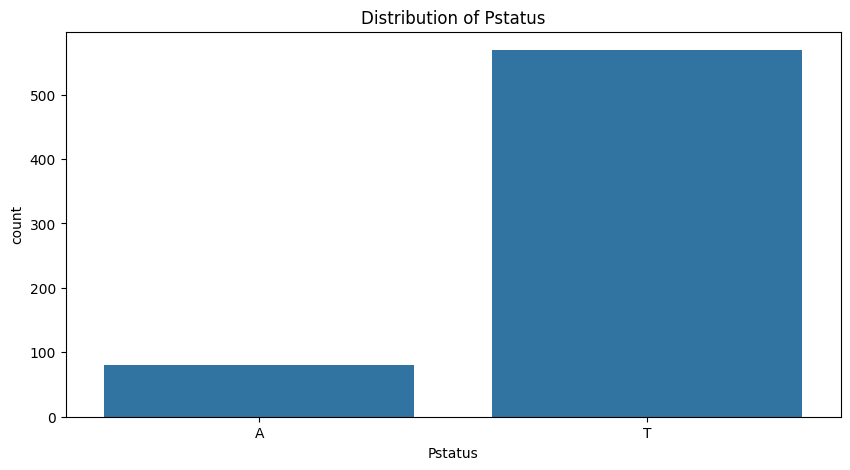

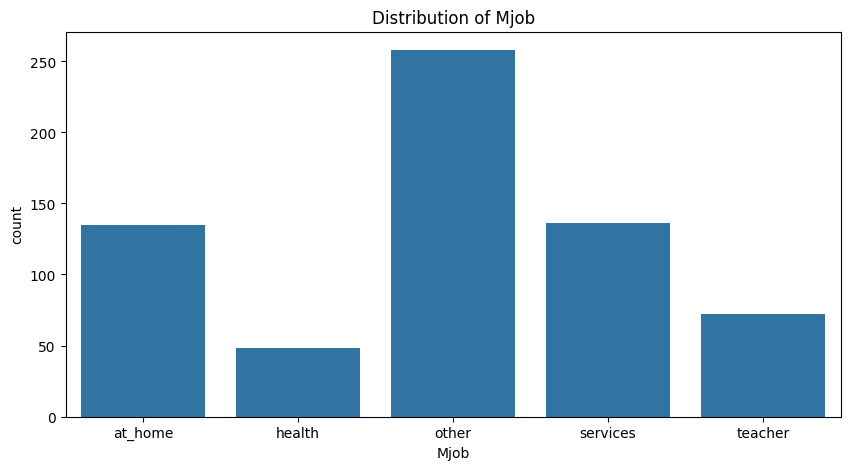

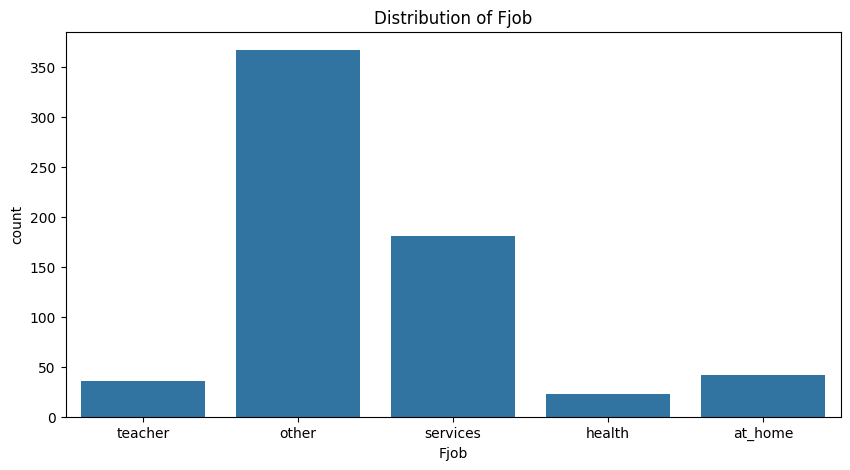

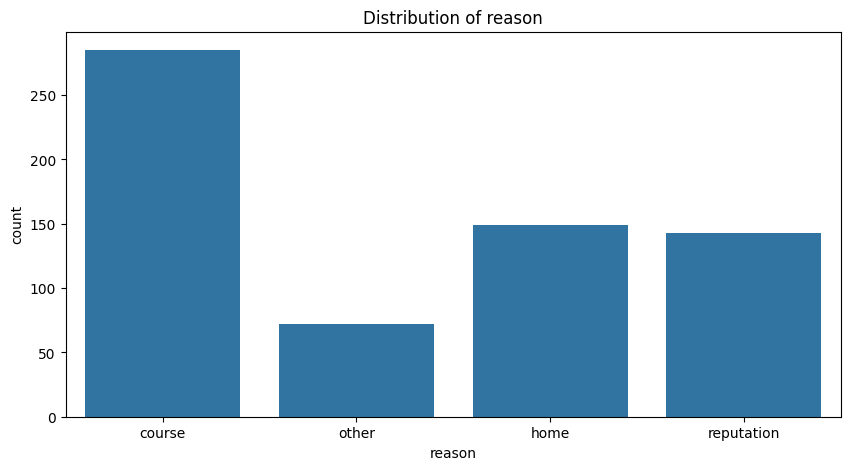

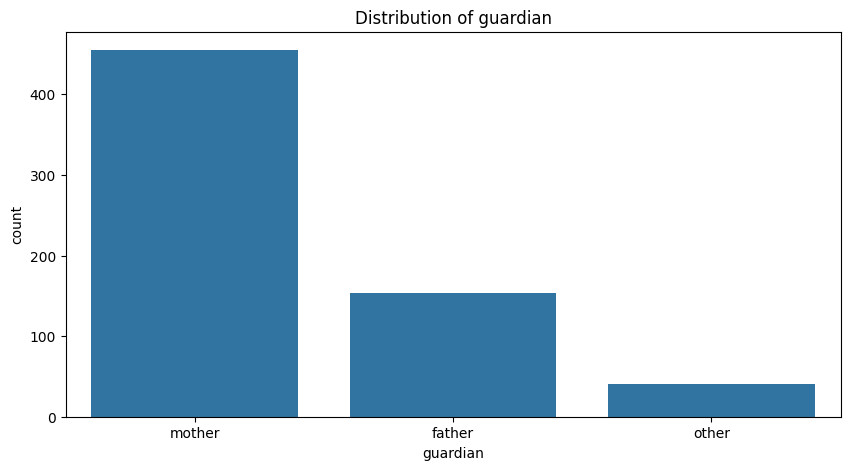

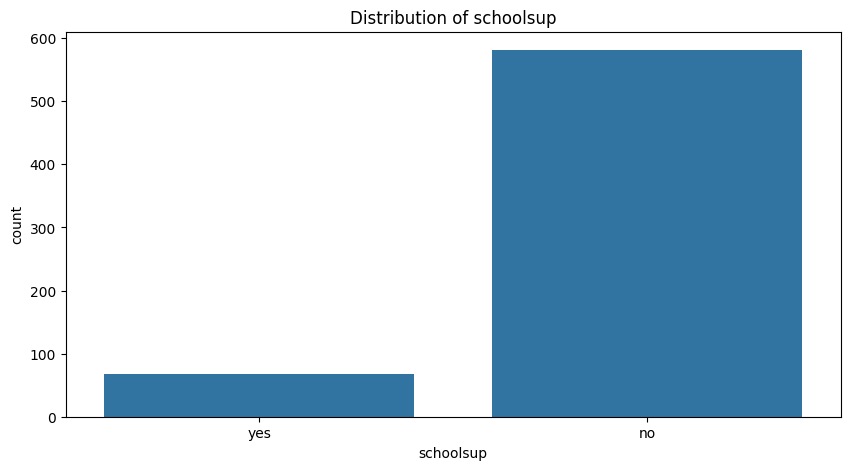

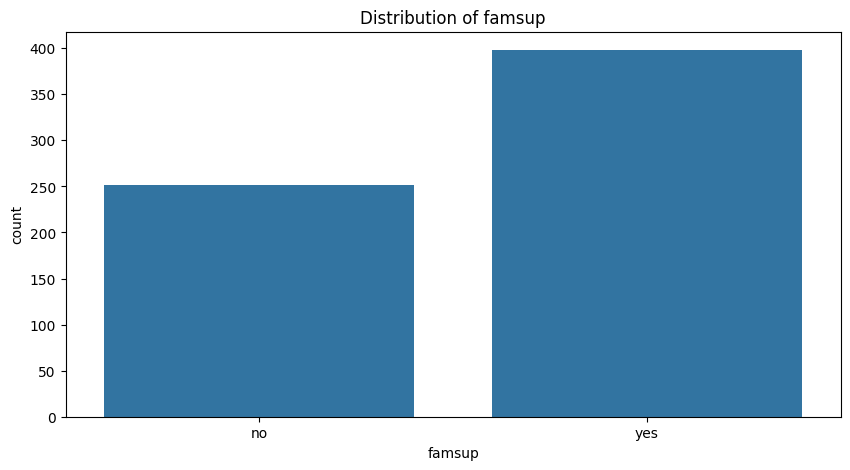

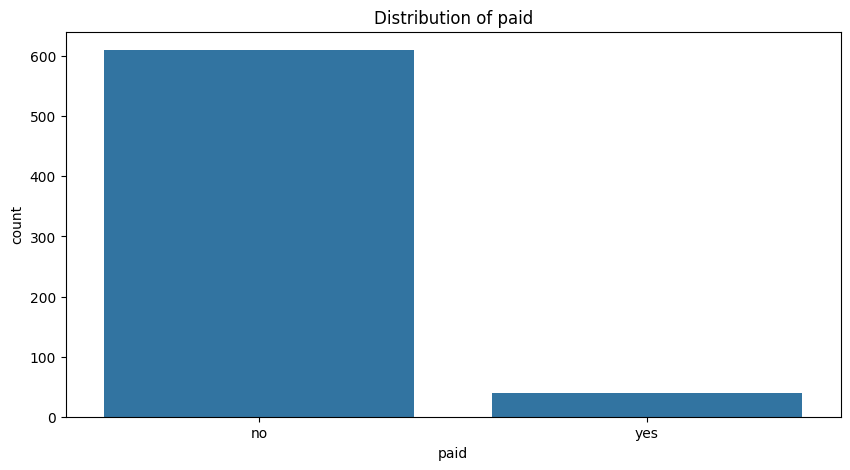

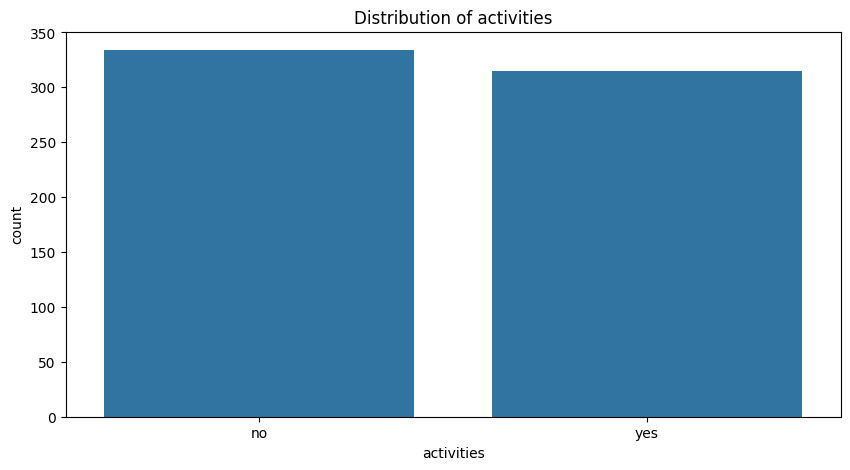

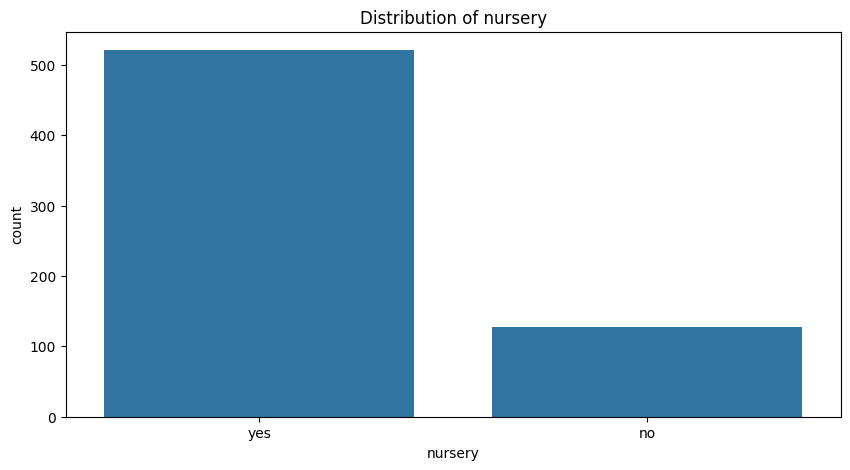

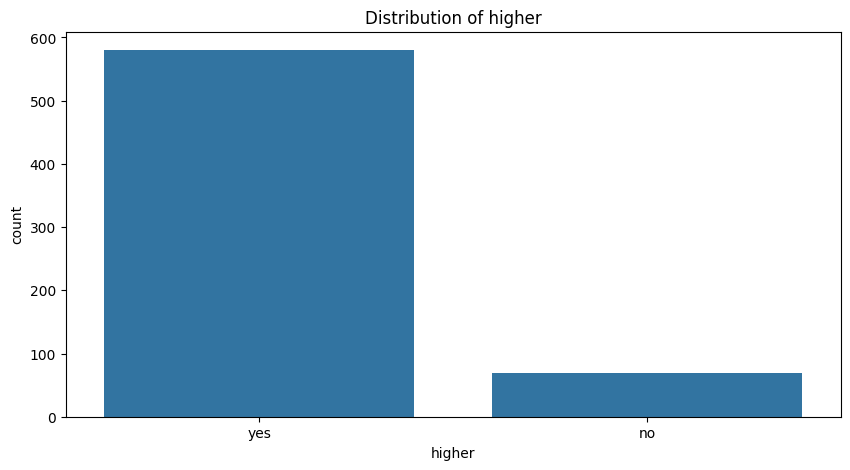

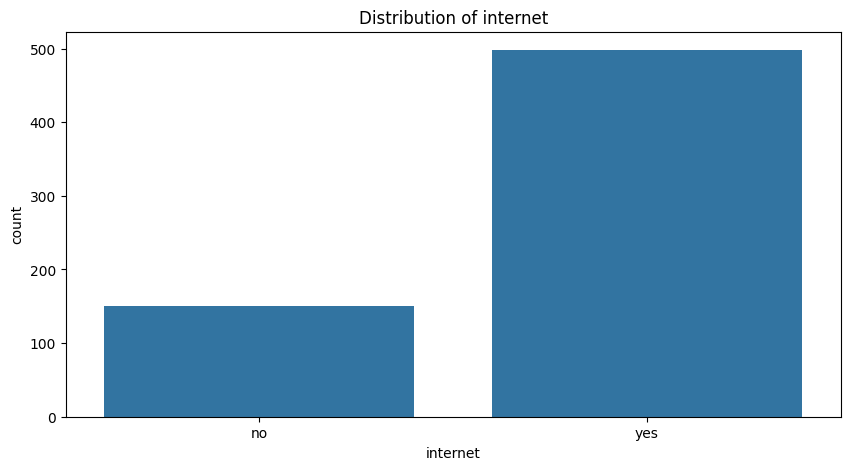

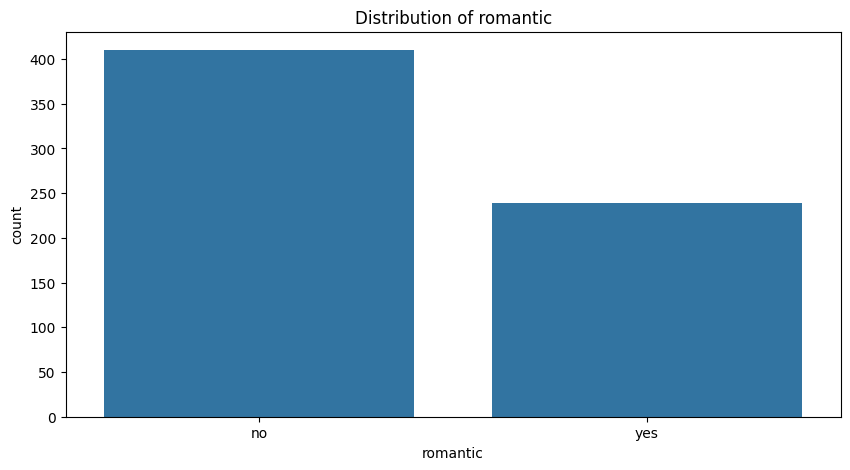

In [13]:
for feature in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
plt.show()

#### Target variable analysis

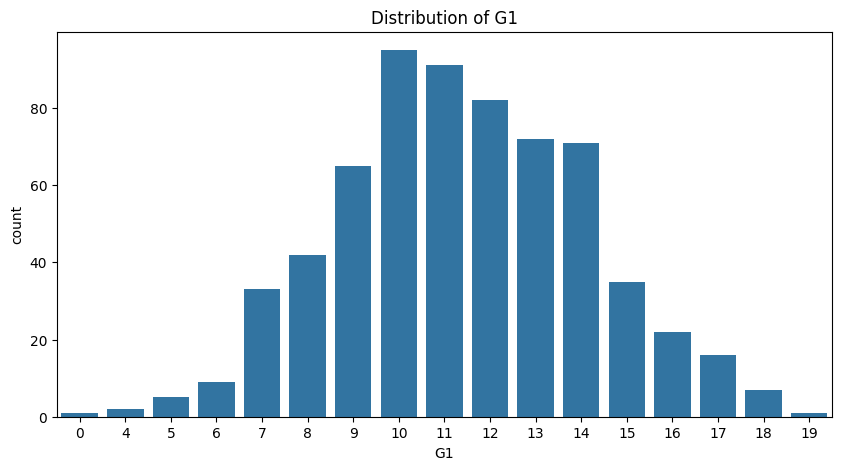

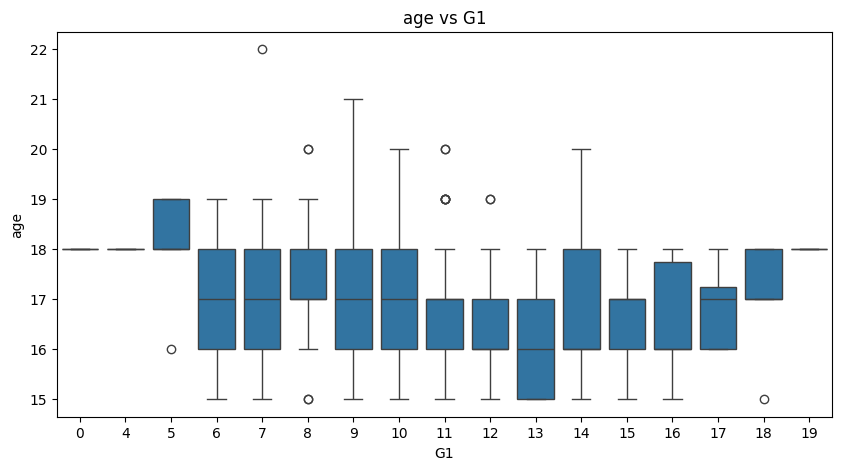

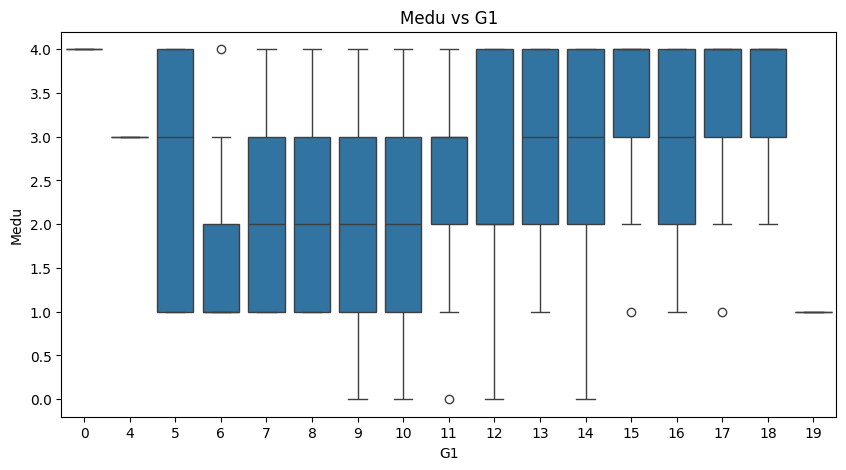

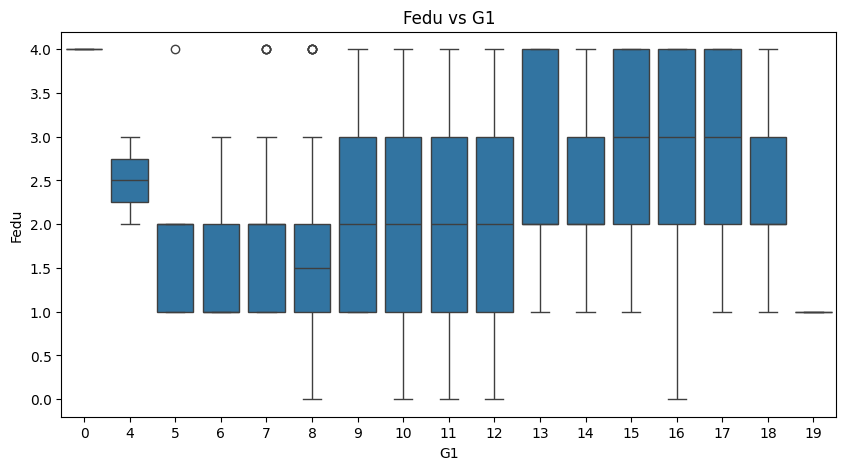

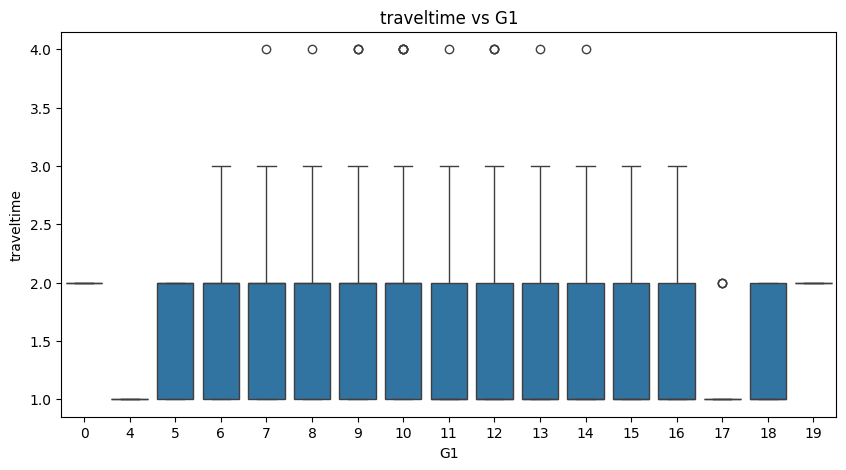

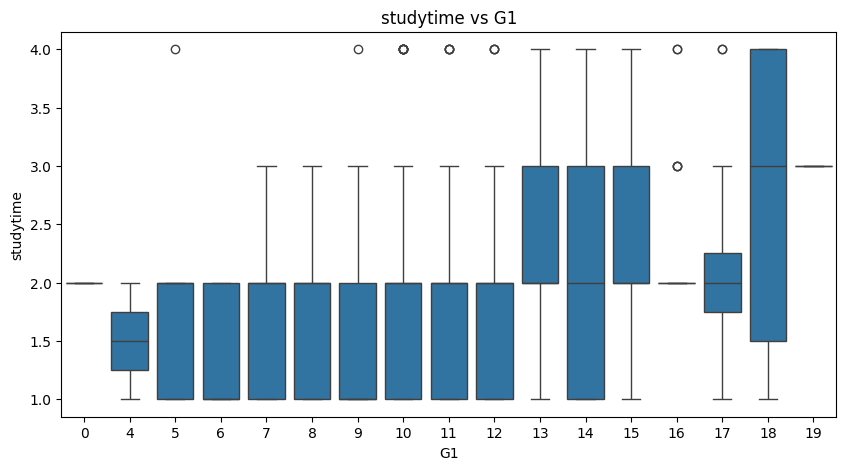

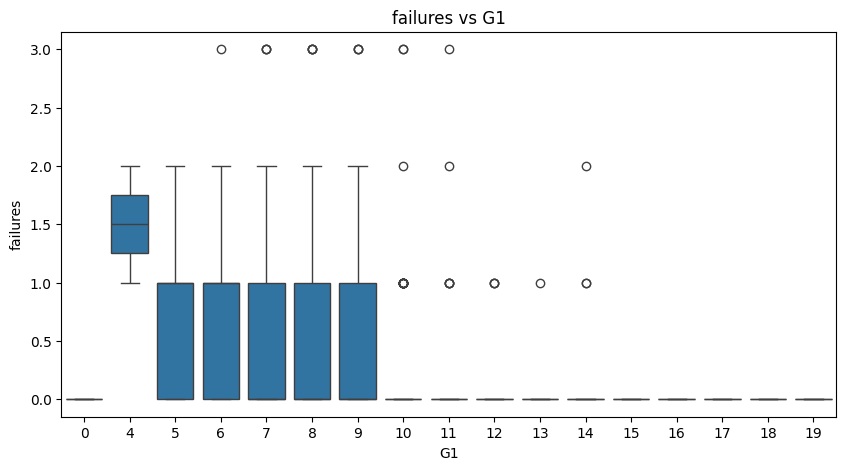

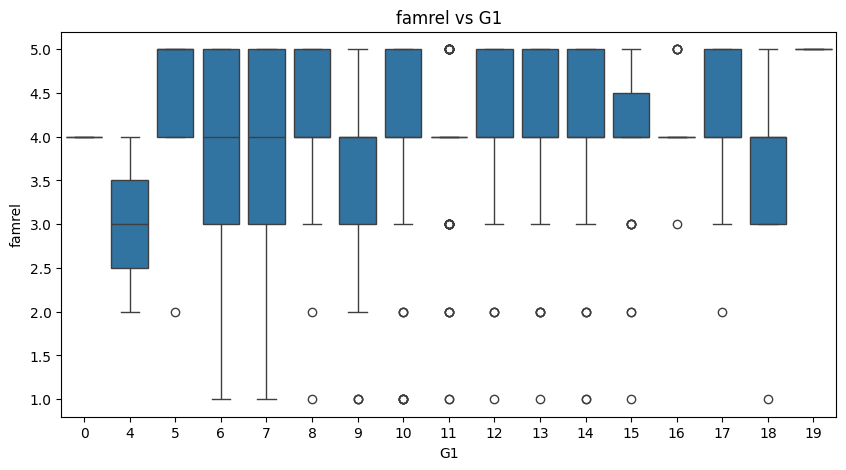

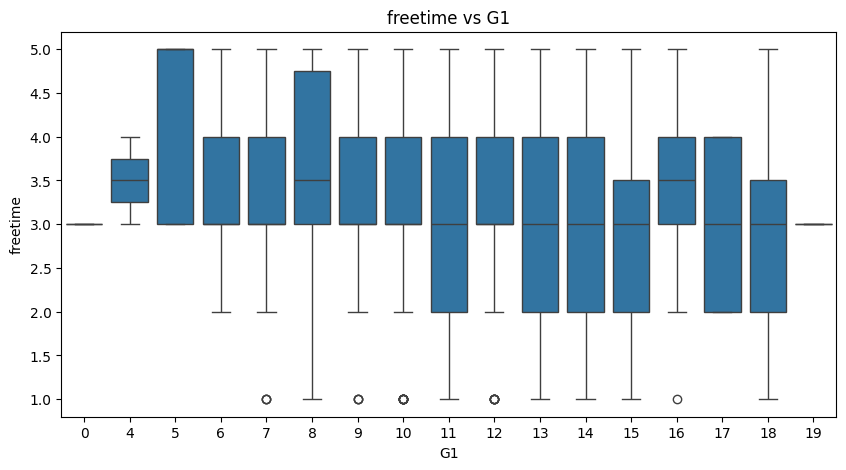

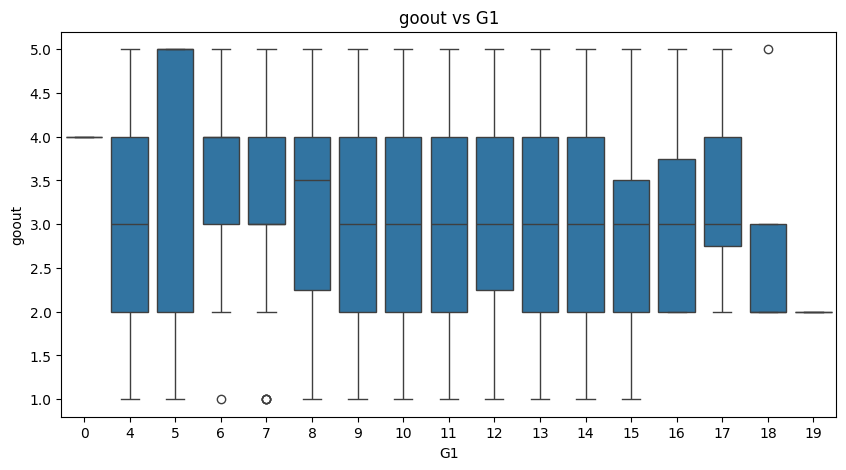

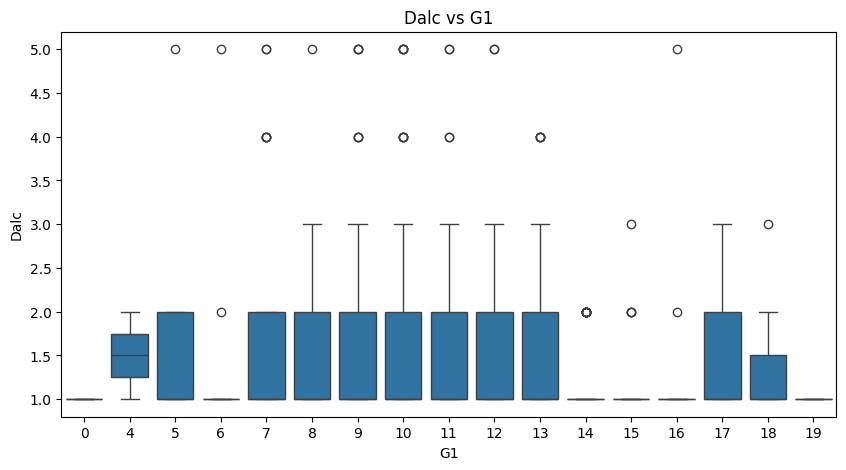

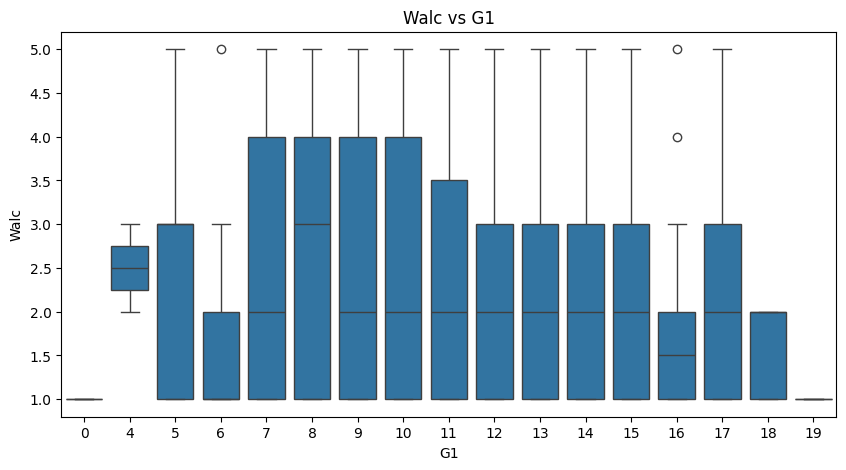

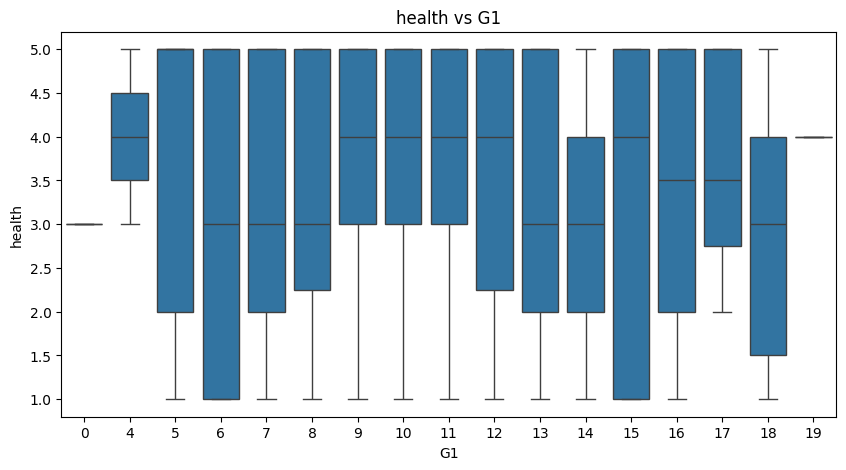

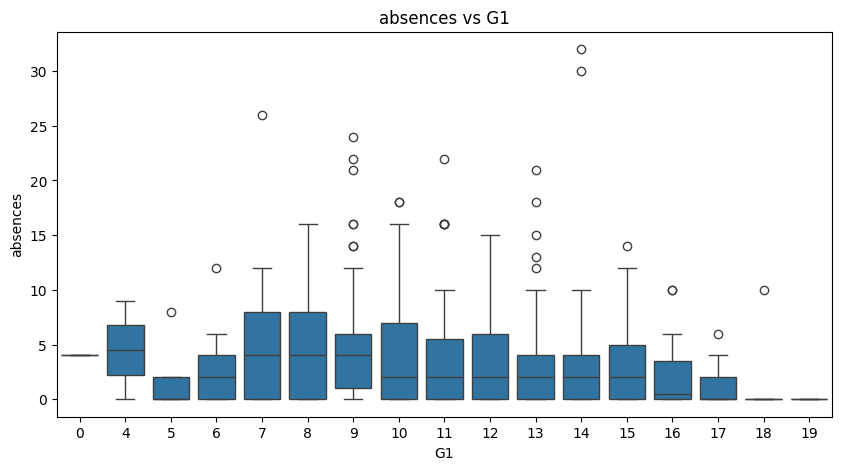

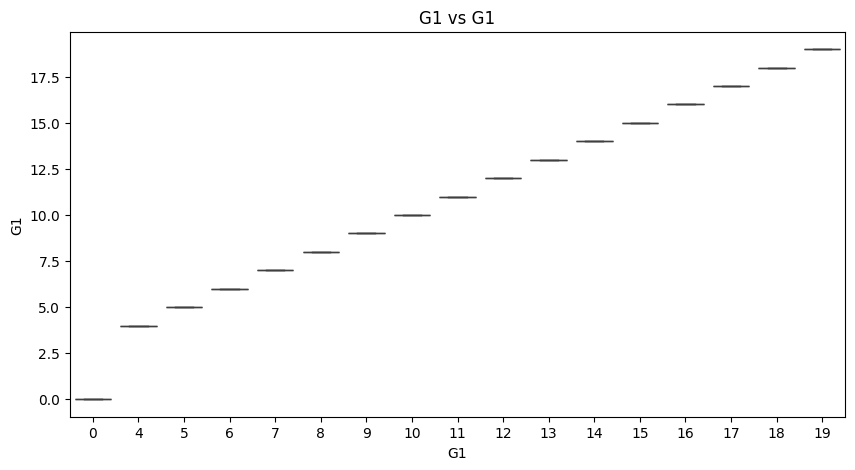

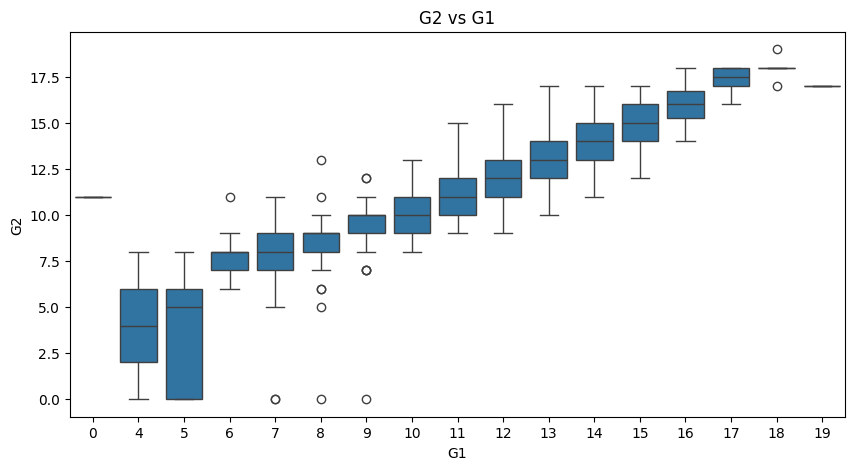

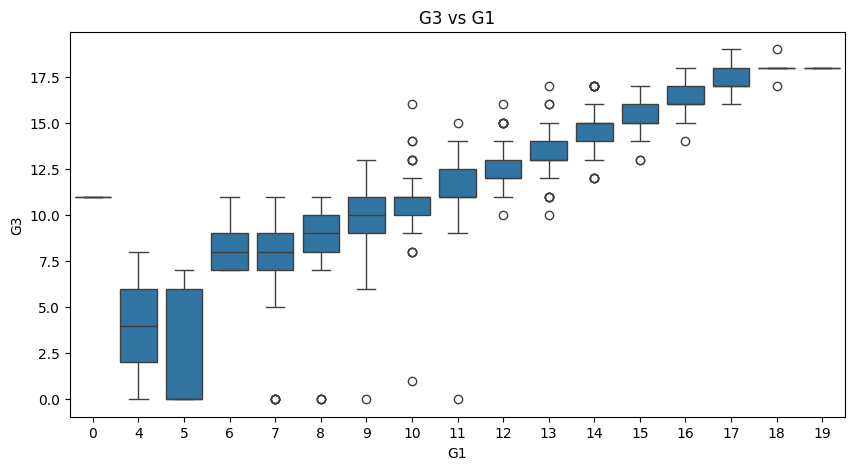

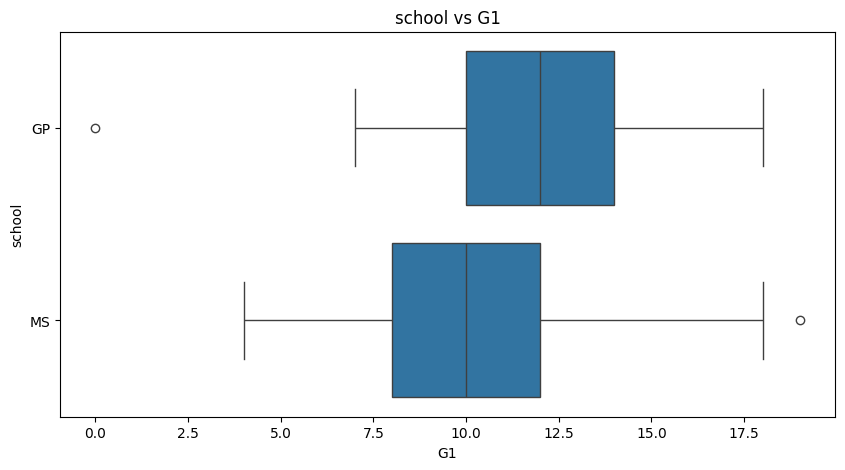

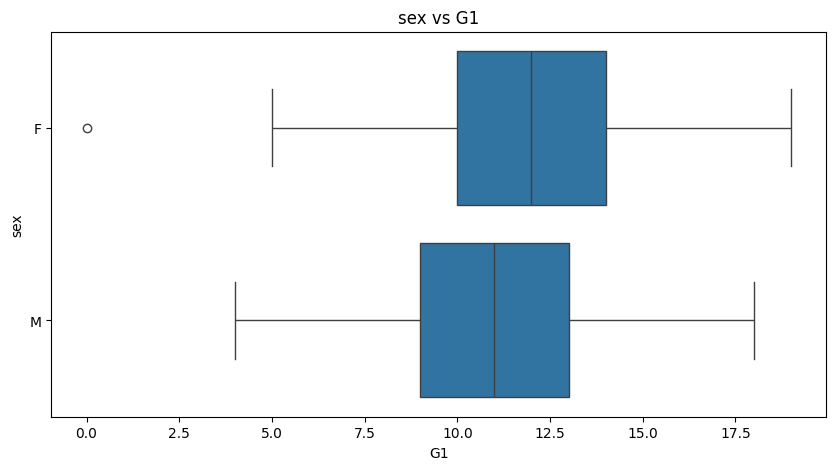

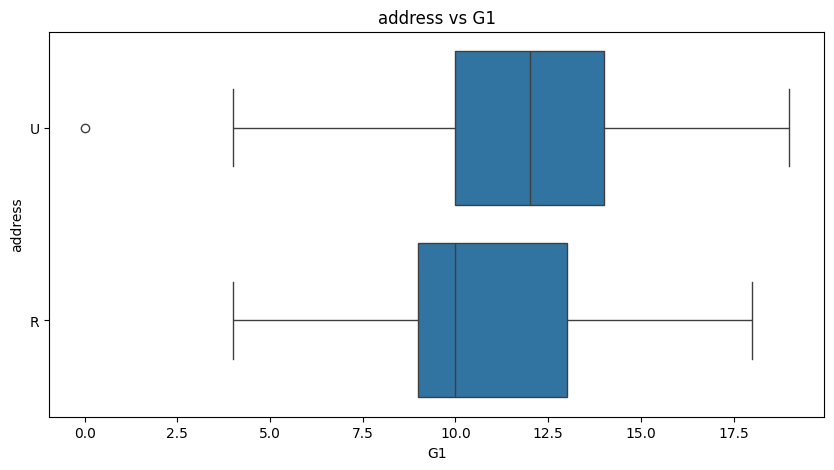

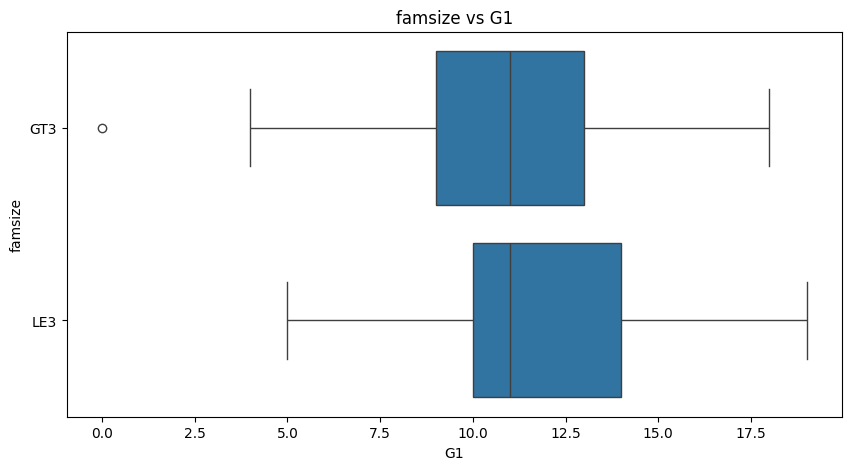

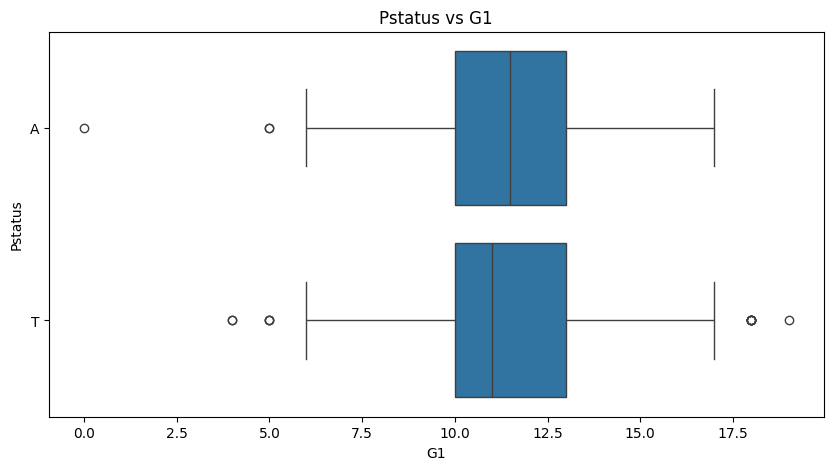

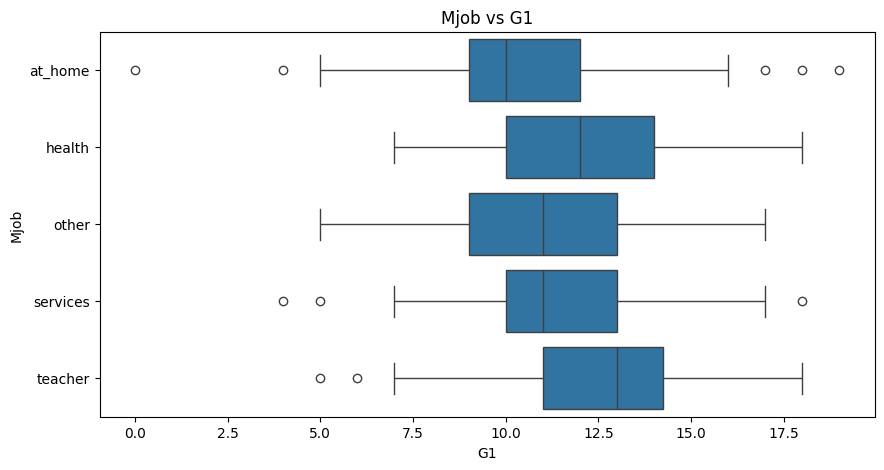

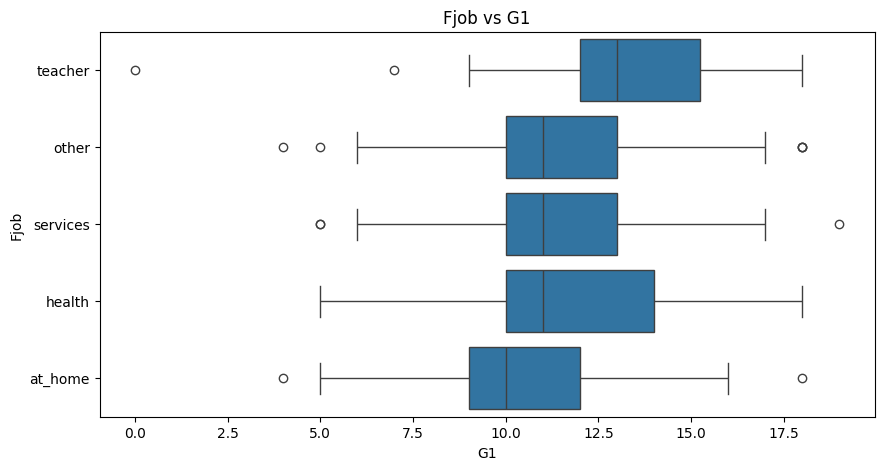

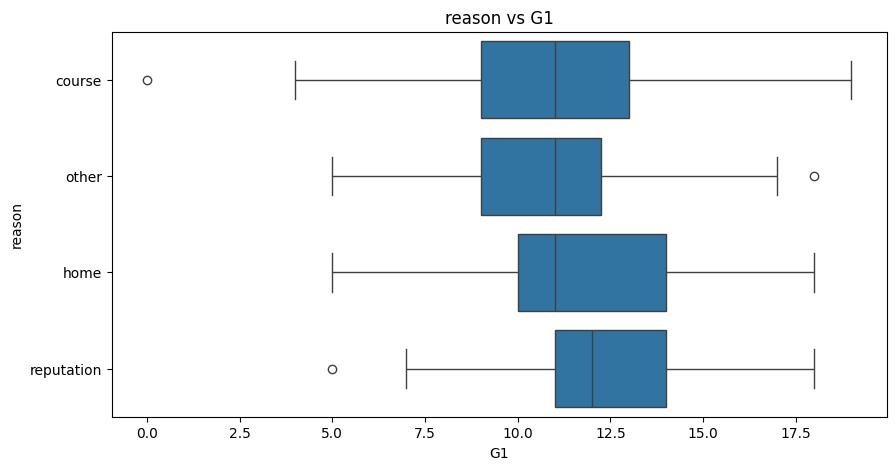

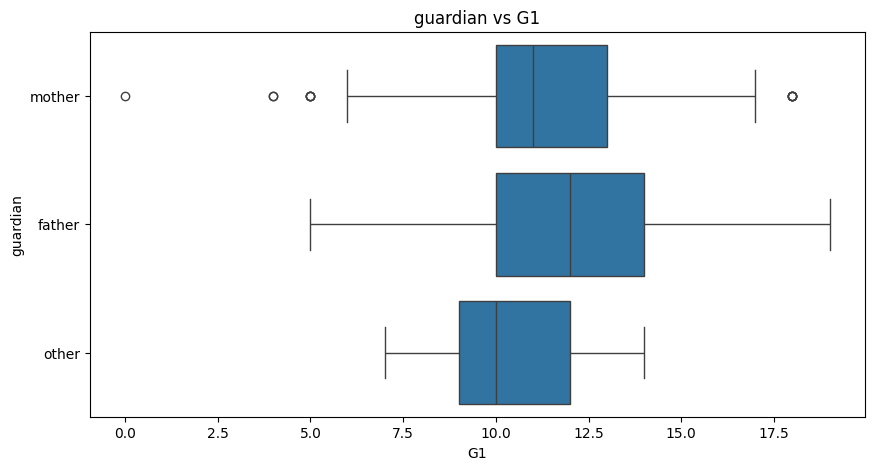

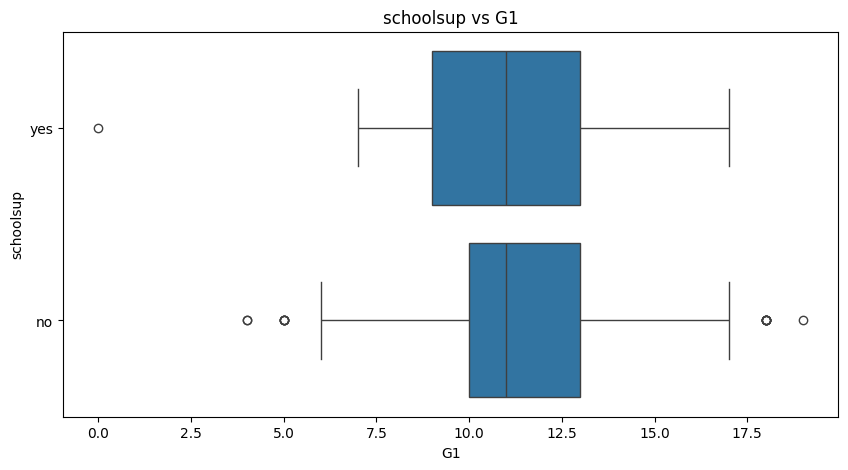

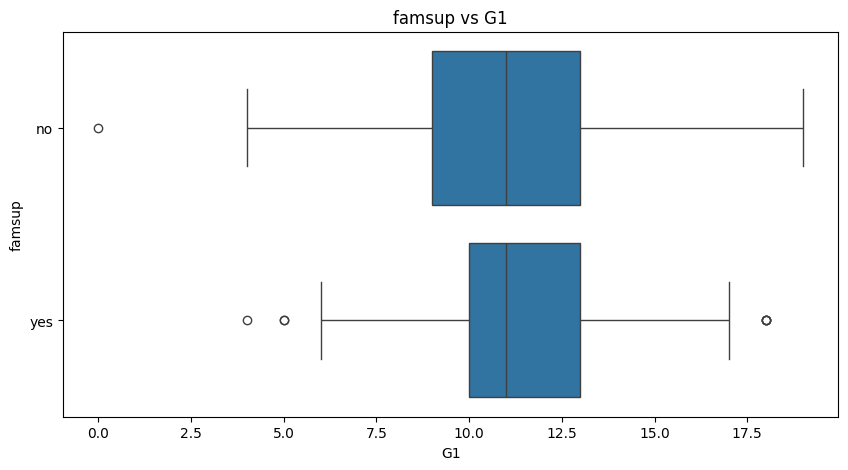

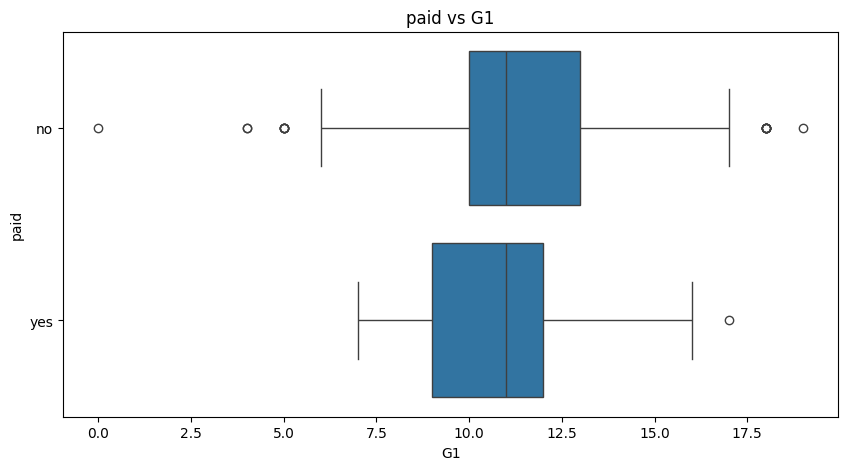

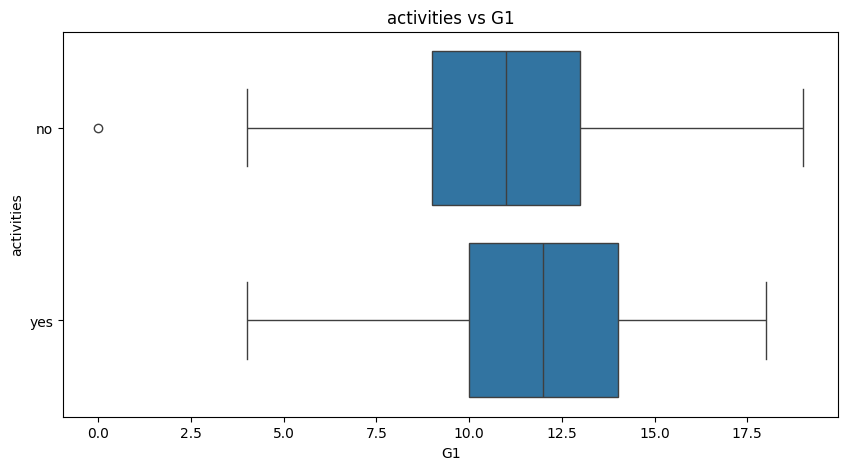

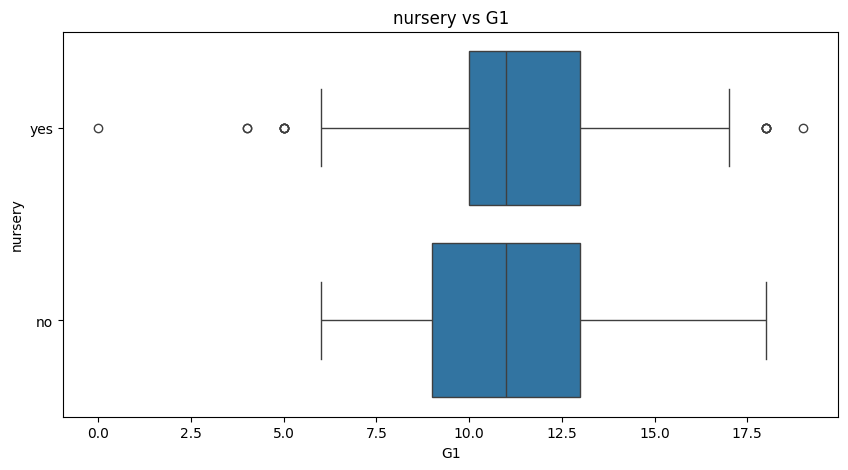

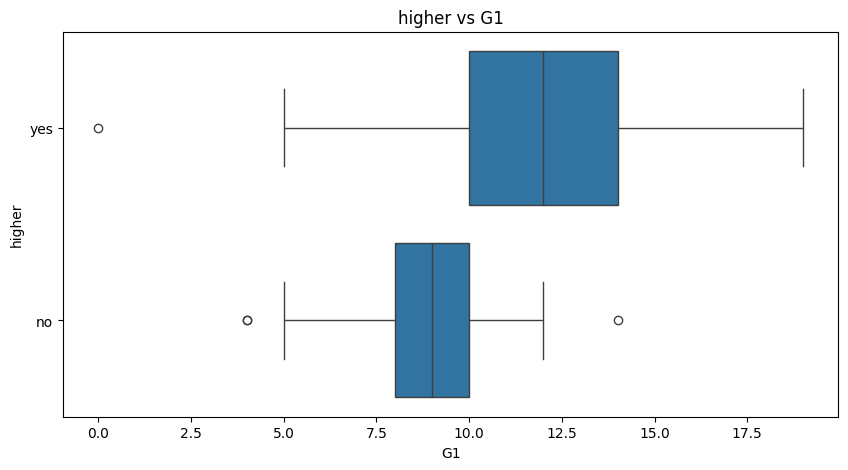

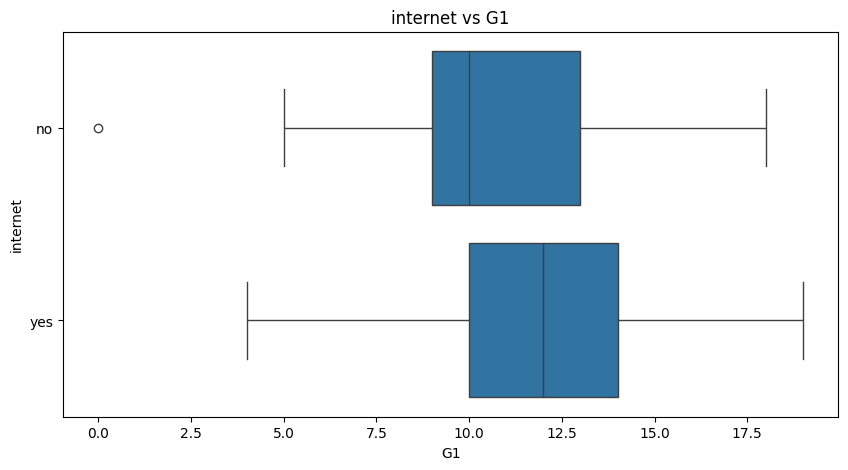

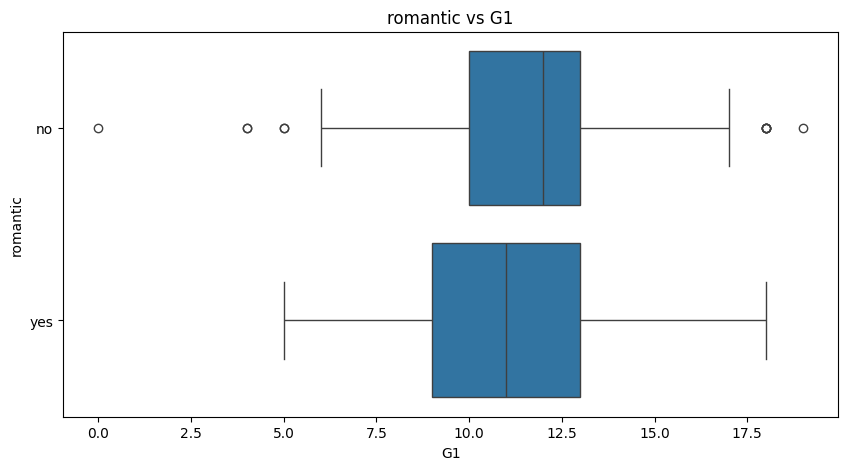

In [10]:
target = 'G1'
if target in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[target])
    plt.title(f'Distribution of {target}')
    plt.show()

    for feature in df.select_dtypes(include=['int64']).columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[target], y=df[feature])
        plt.title(f'{feature} vs {target}')
        plt.show()

    for feature in df.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[target], y=df[feature])
        plt.title(f'{feature} vs {target}')
        plt.show()